In [1]:
!pip install gensim

In [5]:
import gensim

import gensim.downloader

In [6]:
#Example from directions
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog', topn=5))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))

[('cat', 0.8798075318336487), ('dogs', 0.834430992603302), ('pet', 0.7449565529823303), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549)]
0.8798075


In [7]:
# Load pre-trained Word2Vec model trained on wikipedia data
#finding the most similar words to a word I choose

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

baseball = model['baseball']

# Getting the most similar words

print(model.most_similar('baseball', topn=5))

# Getting the similarity between two words

print(model.similarity('baseball', 'base'))

[('basketball', 0.7645361423492432), ('leagues', 0.7626137137413025), ('football', 0.76057368516922), ('league', 0.7323171496391296), ('hockey', 0.7312085628509521)]
0.32313913


The result does make sense because they are similar words to baseball like "leagues"

In [8]:
#Example from directions
#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))

[('paris', 0.8827145099639893), ('france', 0.755802571773529), ('french', 0.7075164318084717), ('prohertrib', 0.6943174004554749), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627395629883), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.4533276855945587), ('non-arabs', 0.45208775997161865), ('amerindians', 0.4478239119052887), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768069267273), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835323572158813), ('pet', 0.6792976260185242), ('horses', 0.6774963736534119), ('pigs', 0.6755764484405518), ('animal', 0.6683686971664429)]


In [9]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)


[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.5003889799118042)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.4072844088077545), ('technicals', 0.40608730912208557), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454433441162)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089029550552368),
 ('doctors', 0.6793617606163025),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694241762161255),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466938257217407)]

In [10]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document 
#AI generated code
# Calculate the gender vector
gender = model["woman"] - model["man"]

# List of words you want to modify
words_to_modify = ["doctor", "engineer", "nurse"]

# Modify each word and find similar words
for word in words_to_modify:
    modified_vector = model[word] + gender  # Add the gender vector
    similar_words = model.most_similar(modified_vector)  # Find similar words
    print(f"Words similar to {word} with gender dimension added:")
    print(similar_words)

Words similar to doctor with gender dimension added:
[('doctor', 0.8661208748817444), ('nurse', 0.7757077813148499), ('physician', 0.7128061652183533), ('woman', 0.7089029550552368), ('doctors', 0.6793617606163025), ('pregnant', 0.6787967681884766), ('patient', 0.6772218346595764), ('dentist', 0.6694241762161255), ('mother', 0.6586816310882568), ('medical', 0.6466938257217407)]
Words similar to engineer with gender dimension added:
[('engineer', 0.8386673927307129), ('technician', 0.6592557430267334), ('educator', 0.6148399114608765), ('surgeon', 0.595658004283905), ('contractor', 0.5834691524505615), ('engineers', 0.5829452872276306), ('nurse', 0.5769463181495667), ('engineering', 0.5586187243461609), ('worker', 0.5585638880729675), ('physician', 0.5567297339439392)]
Words similar to nurse with gender dimension added:
[('nurse', 0.8992332816123962), ('nurses', 0.6888664364814758), ('pregnant', 0.688625693321228), ('nursing', 0.6761317849159241), ('midwife', 0.6643050312995911), ('dent

#There is bias and assumptions in the data because the model is assuming that a doctor is oriented towards a male perspective of the vector and a nurse is oriented towards the female perspective, for example. This bias continues to show throughout the data.

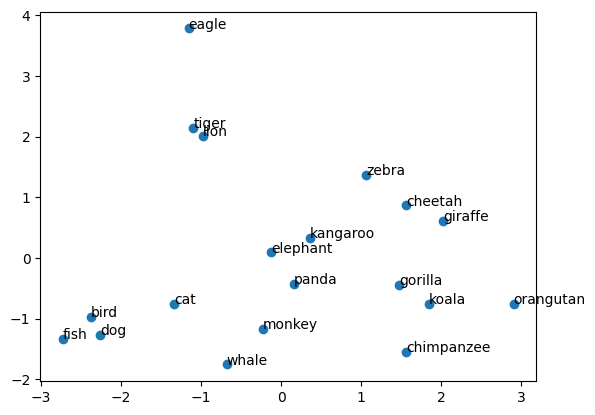

In [13]:
#Example from directions
#visualize pca of word embeddings


from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

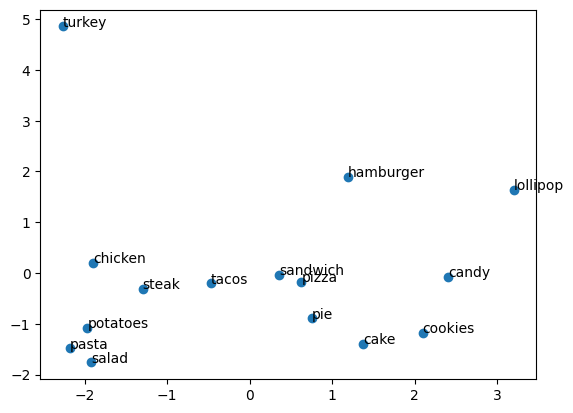

In [14]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["pasta","tacos","cookies", "cake", "pie", "candy", "lollipop", "sandwich", "hamburger", "steak", "chicken", "salad", "turkey", "potatoes",  "pizza",]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

#The distances and proximities do make since because the foods that are similar are closer together and the foods that are different are far away from each other.

In [15]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
pca

PCA(n_components=2)

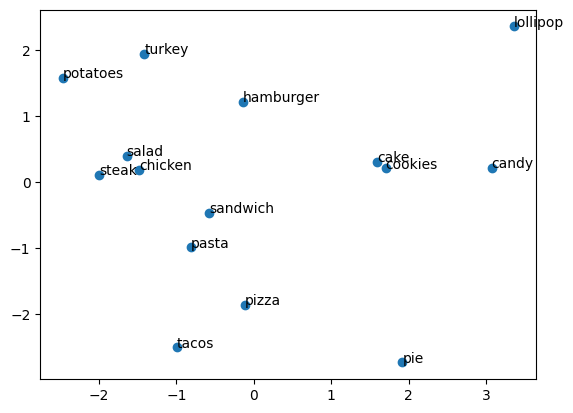

In [17]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
pca 
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["pasta","tacos","cookies", "cake", "pie", "candy", "lollipop", "sandwich", "hamburger", "steak", "chicken", "salad", "turkey","potatoes",  "pizza",]

X = [twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X) 
plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

#What has changed in the embedding space? What might this have to do with the training data? The word similarity and positions have changed. This might have to do with the fact that the wiki model is trained more on data from a site that is more based on facts, and the twitter model is trained more on data that is based on the opinions you would expect from a social media site. 

In [18]:
#From directions
import pandas as pd
uiuc=pd.read_csv("uiuc.csv") 
mich=pd.read_csv("umich.csv")  

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0  

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])



In [15]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [16]:
import pandas as pd
mich['cleaned_text'] = mich['text'].apply(clean)

In [17]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

In [18]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [19]:
#do the same for the uiuc subreddit 
import pandas as pd
uiuc['cleaned_text'] = uiuc['text'].apply(clean)

In [20]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

In [21]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(uiuc['cleaned_text'])

Total number of embeddings: 228365


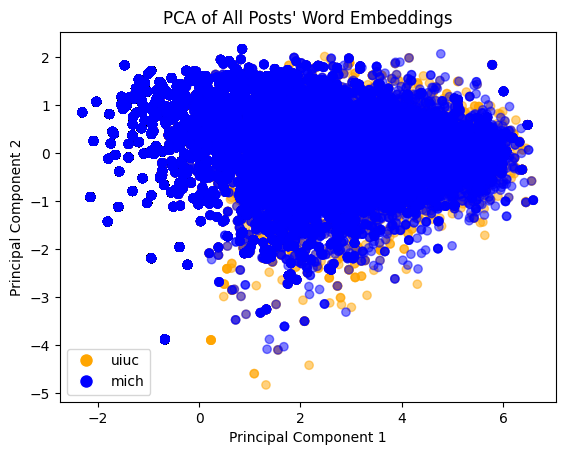

In [30]:
#pca of the subreddit datasets  
#AI generated code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gensim.downloader

# Load your datasets
sentences_uiuc = list(uiuc["text"])
sentences_mich = list(mich["text"])
sentences = sentences_uiuc + sentences_mich

# Load GloVe model
twitter_model = gensim.downloader.load("glove-twitter-100")

# Function to calculate embeddings for each post without averaging
def get_post_embeddings(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    return embeddings  # Return all embeddings found for the words

# Initialize lists to hold all embeddings and their labels
all_embeddings = []
labels = []

# Calculate embeddings for each post and assign labels
for sentence in sentences_uiuc:
    embeddings = get_post_embeddings(sentence, twitter_model)
    if embeddings:
        all_embeddings.extend(embeddings)
        labels.extend(['uiuc'] * len(embeddings))

for sentence in sentences_mich:
    embeddings = get_post_embeddings(sentence, twitter_model)
    if embeddings:
        all_embeddings.extend(embeddings)
        labels.extend(['mich'] * len(embeddings))

# Convert to NumPy array for PCA
flat_embeddings = np.array(all_embeddings)

# Print number of embeddings
print(f"Total number of embeddings: {flat_embeddings.shape[0]}")

# If there are not enough embeddings, handle that case
if flat_embeddings.shape[0] < 2:
    print("Not enough valid embeddings to perform PCA.")
else:
    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(flat_embeddings)

    # Define color mapping
    color_map = {'uiuc': 'orange', 'mich': 'blue'}
    colors = [color_map[label] for label in labels]

    # Plot PCA with color coding
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5)
    plt.title("PCA of All Posts' Word Embeddings")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

    # Create legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                           markerfacecolor=color_map[label], markersize=10) for label in color_map]
    plt.legend(handles=handles)

    plt.show()

#The separation betweeen the two columns is not completely clear because most of it is clustered together in a mass of blue. There are a few outliers but it is mostly unclear separation.

In [29]:
import gensim

import gensim.downloader

Number of valid embeddings: 8787


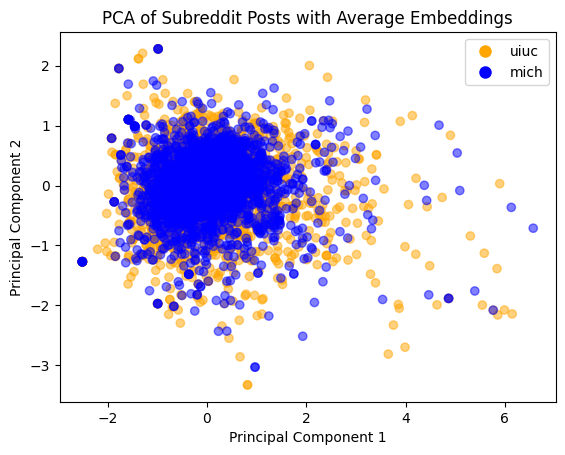

In [42]:
#AI generated code
#pca of datasets with average embeddings implemented
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gensim.downloader

# Function to calculate average embedding
def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if not embeddings:
        return np.zeros(model.vector_size)  # Return a zero vector if no words found
    return np.mean(embeddings, axis=0)

# Load your data
sentences_uiuc = list(uiuc["text"])
sentences_mich = list(mich["text"])

# Create labels for the sentences
labels_uiuc = ['uiuc'] * len(sentences_uiuc)
labels_mich = ['mich'] * len(sentences_mich)
labels = labels_uiuc + labels_mich

# Combine sentences
sentences = sentences_uiuc + sentences_mich

# Load GloVe model
twitter_model = gensim.downloader.load("glove-twitter-100")

# Calculate average embeddings
avg_embeddings = [avg_embedding(sentence, twitter_model) for sentence in sentences]

# Filter out zero vectors
avg_embeddings = [embedding for embedding in avg_embeddings if not np.all(embedding == 0)]

# Filter corresponding labels for valid embeddings
valid_indices = [i for i, embedding in enumerate(avg_embeddings) if not np.all(embedding == 0)]
filtered_labels = [labels[i] for i in valid_indices]

# Print number of valid embeddings
print(f"Number of valid embeddings: {len(avg_embeddings)}")

# If there are not enough embeddings, handle that case
if len(avg_embeddings) < 2:
    print("Not enough valid embeddings to perform PCA.")
else:
    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(avg_embeddings)

    # Define color mapping
    color_map = {'uiuc': 'orange', 'mich': 'blue'}
    colors = [color_map[label] for label in filtered_labels]

    # Plot PCA with color coding
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5)
    plt.title("PCA of Subreddit Posts with Average Embeddings")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

    # Create legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                           markerfacecolor=color_map[label], markersize=10) for label in color_map]
    plt.legend(handles=handles)

    plt.show()

#This pca is different than the previous one because there are more points that are further apart from each other. There is still the big cluster in the mideel but there are more points that are spread out.

#The separation is not completely clear, but there are columns that are more noticeable in this pca than the other one.

In [24]:
avg_embeddings

[array([-5.94265908e-02,  2.16561764e-01,  2.17162430e-01, -2.07008094e-01,
        -1.85803119e-02,  1.03377223e-01, -2.25059807e-01,  1.95325166e-01,
        -1.32214263e-01,  4.87200767e-02,  1.38964176e-01, -1.57303177e-02,
         1.90432787e-01,  4.92333472e-02,  9.14963782e-02, -3.05744469e-01,
         2.31612384e-01,  1.91008493e-01, -5.18769920e-01,  1.66513562e-01,
         1.97353467e-01, -8.62271413e-02,  2.63402373e-01, -5.86211123e-02,
        -3.80052230e-03, -1.81906849e-01, -2.96372324e-02, -3.52820665e-01,
         8.24064985e-02, -4.93254475e-02, -9.75454599e-02,  3.53015959e-01,
        -1.68862000e-01,  9.71647277e-02, -1.52677596e-02,  3.17389905e-01,
        -7.78746977e-02,  3.07475537e-01, -7.71838501e-02, -2.00014651e-01,
        -5.29786766e-01, -1.27075791e-01, -5.07589616e-02, -3.07473123e-01,
        -1.56372592e-01,  6.38223952e-03,  1.72512248e-01, -3.43219370e-01,
        -8.52597505e-02, -8.00189853e-01,  1.15258746e-01,  6.01372458e-02,
         1.2

In [40]:
!pip install transformers[torch]

   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 2.1/203.0 MB 9.0 MB/s eta 0:00:23
    --------------------------------------- 4.2/203.0 MB 9.7 MB/s eta 0:00:21
   - -------------------------------------- 6.6/203.0 MB 10.1 MB/s eta 0:00:20
   - -------------------------------------- 8.9/203.0 MB 10.2 MB/s eta 0:00:19
   -- ------------------------------------- 10.7/203.0 MB 10.0 MB/s eta 0:00:20
   -- ------------------------------------- 12.8/203.0 MB 10.1 MB/s eta 0:00:19
   -- ------------------------------------- 15.2/203.0 MB 10.2 MB/s eta 0:00:19
   --- ------------------------------------ 17.3/203.0 MB 10.0 MB/s eta 0:00:19
   --- ------------------------------------ 19.4/203.0 MB 10.0 MB/s eta 0:00:19
   ---- ----------------------------------- 20.7/203.0 MB 9.7 MB/s eta 0:00:19
   ---- ----------------------------------- 22.8/203.0 MB 9.7 MB/s eta 0:00:19
   ---- ----------------------------------- 24.9/203.0 MB

In [32]:
# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

c:\Users\16302\miniconda3\envs\is310\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [33]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I hate English")

[{'label': 'NEG', 'score': 0.9768329858779907}]

In [36]:
#AI generated code
import pandas as pd
from transformers import pipeline

# Load your datasets
# Assuming uiuc and mich are pandas DataFrames with a 'text' column

# Create the sentiment analysis pipeline
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Function to classify sentiments of posts
def classify_sentiments(posts, batch_size=16):
    sentiments = []
    for i in range(0, len(posts), batch_size):
        batch = posts[i:i + batch_size]
        try:
            sentiments.extend(pipe(batch.tolist()))  # Classify each batch
        except Exception as e:
            print(f"Error processing batch starting at index {i}: {e}")
    return [sentiment['label'] for sentiment in sentiments]

# Filter out empty or NaN entries
uiuc_filtered = uiuc["text"].dropna().loc[uiuc["text"].str.strip() != ''].astype(str)
mich_filtered = mich["text"].dropna().loc[mich["text"].str.strip() != ''].astype(str)

# Classify sentiments for both datasets
uiuc_sentiments = classify_sentiments(uiuc_filtered)
mich_sentiments = classify_sentiments(mich_filtered)

# Count the most common sentiment labels
uiuc_sentiment_counts = pd.Series(uiuc_sentiments).value_counts()
mich_sentiment_counts = pd.Series(mich_sentiments).value_counts()

# Get the most common sentiment
most_common_uiuc = uiuc_sentiment_counts.idxmax(), uiuc_sentiment_counts.max()
most_common_mich = mich_sentiment_counts.idxmax(), mich_sentiment_counts.max()

# Report the results
print(f"UIUC Dataset - Most Common Sentiment: {most_common_uiuc[0]} with {most_common_uiuc[1]} occurrences")
print(f"MICH Dataset - Most Common Sentiment: {most_common_mich[0]} with {most_common_mich[1]} occurrences")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Token indices sequence length is longer than the specified maximum sequence length for this model (299 > 128). Running this sequence through the model will result in indexing errors


Error processing batch starting at index 16: index out of range in self
Error processing batch starting at index 32: index out of range in self
Error processing batch starting at index 48: index out of range in self
Error processing batch starting at index 64: index out of range in self
Error processing batch starting at index 128: index out of range in self
Error processing batch starting at index 144: index out of range in self
Error processing batch starting at index 208: index out of range in self
Error processing batch starting at index 224: index out of range in self
Error processing batch starting at index 240: index out of range in self
Error processing batch starting at index 256: index out of range in self
Error processing batch starting at index 368: index out of range in self
Error processing batch starting at index 416: index out of range in self
Error processing batch starting at index 448: index out of range in self
Error processing batch starting at index 544: index out

In [39]:
#AI generated code
import pandas as pd
from transformers import pipeline

# Load your datasets
# Assuming uiuc and mich are pandas DataFrames with a 'text' column

# Create the sentiment analysis pipeline
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Function to classify sentiments of posts
def classify_sentiments(posts, batch_size=16):
    sentiments = []
    for i in range(0, len(posts), batch_size):
        batch = posts[i:i + batch_size]
        try:
            sentiments.extend(pipe(batch.tolist()))  # Classify each batch
        except Exception as e:
            print(f"Error processing batch starting at index {i}: {e}")
    return [sentiment['label'] for sentiment in sentiments]
# Filter out empty or NaN entries and reset the index
uiuc_filtered = uiuc["text"].dropna().loc[uiuc["text"].str.strip() != ''].astype(str).reset_index(drop=True)
mich_filtered = mich["text"].dropna().loc[mich["text"].str.strip() != ''].astype(str).reset_index(drop=True)

# Ensure sentiments are calculated for the filtered posts
uiuc_sentiments = classify_sentiments(uiuc_filtered)
mich_sentiments = classify_sentiments(mich_filtered)

# Check lengths
print(f"Length of UIUC filtered posts: {len(uiuc_filtered)}")
print(f"Length of UIUC sentiments: {len(uiuc_sentiments)}")

print(f"Length of MICH filtered posts: {len(mich_filtered)}")
print(f"Length of MICH sentiments: {len(mich_sentiments)}")

# Combine posts and labels if lengths match
if len(uiuc_filtered) == len(uiuc_sentiments):
    uiuc_sample = sample_posts_with_labels(uiuc_filtered, uiuc_sentiments)
    print("UIUC Sample Posts with Labels:")
    print(uiuc_sample)
else:
    print("Length mismatch between UIUC filtered posts and sentiments!")

if len(mich_filtered) == len(mich_sentiments):
    mich_sample = sample_posts_with_labels(mich_filtered, mich_sentiments)
    print("\nMICH Sample Posts with Labels:")
    print(mich_sample)
else:
    print("Length mismatch between MICH filtered posts and sentiments!")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Token indices sequence length is longer than the specified maximum sequence length for this model (299 > 128). Running this sequence through the model will result in indexing errors


Error processing batch starting at index 16: index out of range in self
Error processing batch starting at index 32: index out of range in self
Error processing batch starting at index 48: index out of range in self
Error processing batch starting at index 64: index out of range in self
Error processing batch starting at index 128: index out of range in self
Error processing batch starting at index 144: index out of range in self
Error processing batch starting at index 208: index out of range in self
Error processing batch starting at index 224: index out of range in self
Error processing batch starting at index 240: index out of range in self
Error processing batch starting at index 256: index out of range in self
Error processing batch starting at index 368: index out of range in self
Error processing batch starting at index 416: index out of range in self
Error processing batch starting at index 448: index out of range in self
Error processing batch starting at index 544: index out

In [41]:
#AI generated code
import pandas as pd

# Assuming you have filtered DataFrames for UIUC and MICH datasets:
# uiuc_filtered = ... (your filtered DataFrame for UIUC)
# mich_filtered = ... (your filtered DataFrame for MICH)

def print_sample_posts(posts, num_samples=10):
    # Sample a specified number of posts randomly
    sample = posts.sample(n=num_samples, random_state=1)  # random_state for reproducibility
    for index, post in sample.items():  # Use items() to iterate over Series
        print(f"Post {index + 1}: {post}\n")

# Print sample posts from UIUC dataset
print("UIUC Sample Posts:")
print_sample_posts(uiuc_filtered)

# Print sample posts from MICH dataset
print("\nMICH Sample Posts:")
print_sample_posts(mich_filtered)

UIUC Sample Posts:
Post 3404: Yeah, that’s exactly where I’m stuck at too

Post 590: I took 18 chemE

Post 1405: I actually had an issue with a Formerly CPM now Smile apartment with my a/c heater that was using way more electricity than it was supposed. $200/month for a 2 bedroom they eventually fixed it when I complained enough.

Post 1196: That sucks. But yeah next time just say it man. Tell those guys that "hey this is an accessigble classroom seat and i was wondering if you could find a another place to sit maybe coz it might be hard for me to climb those stairs"

that way, you're polite, and that guy (and others around him too) probably would learn a new thing!

Post 3249: Don’t get off too hard to all those downvotes

Post 1841: There are several "now hiring" signs at the restaurants on Green St in Campustown.

Post 3061: you should mention if male or female

Post 373: >*”intend on filling for residency after a year or so”*

Keep in mind that you can’t simply “file for residency 

#I agree with these posts, they seem to make logical sense and some give good advice.

#The umich subreddit is more negative based on the sample posts above.

In [34]:
uiuc

,Unnamed: 0,date,post_votes,text,user,com_votes,label,cleaned_text
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1,have the same professor and in lecture he did ...
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1,do you find it helpful to still go to the lect...
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1,have you tried emailing university housing to ...
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1,purchasing illini cash should get you added to...
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1,just did thanks for the suggestion it hadnt oc...
...,...,...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0,1,im interested if youre still looking
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4,1,i went to one of the taylor nights was quite f...
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5,1,hey im so sorry to hear thats happening if you...
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3,1,afaik the cleaning company that ugroup employs...


In [65]:
mich

,Unnamed: 0,date,post_votes,text,user,com_votes,label,cleaned_text
729,729,2024-08-31 14:32:05,515,"Maybe you would like to name some names, rathe...",Damnatus_Terrae,7,0,maybe you would like to name some names rather...
4305,4305,2024-08-11 16:18:07,27,Very strict. I had a friend who had an 850 wat...,414works,214,0,very strict i had a friend who had an watt mi...
3832,3832,2024-08-15 14:57:20,0,that’ll be too much because if you got in into...,kidscore,2,0,thatll be too much because if you got in into ...
4511,4511,2024-08-10 00:28:57,84,They are actually not funding anything at all ...,_iQlusion,1,0,they are actually not funding anything at all ...
4609,4609,2024-08-08 14:23:34,5,Definitely either M-Den or Barnes and Noble,Inner_Letterhead570,12,0,definitely either mden or barnes and noble
...,...,...,...,...,...,...,...,...
4735,4735,2024-08-07 03:34:37,0,"He does say, “I’d love for you guys to check i...",frostbite1002,6,0,he does say id love for you guys to check it o...
890,890,2024-08-30 16:29:52,37,I fed them a half of my cherry pop tart one ti...,ohnololnowwhat,2,0,i fed them a half of my cherry pop tart one ti...
7589,7589,2024-07-12 11:25:27,95,Paying for a master's yourself at Michigan (on...,_iQlusion,1,0,paying for a masters yourself at michigan on l...
2577,2577,2024-08-25 17:50:14,0,Did you make this person sign a contract? If n...,Falanax,7,0,did you make this person sign a contract if no...
